In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### importing my packages

In [ ]:
df = pd.read_csv('/content/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012.csv')
df

### looking at the data/pulling it in

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,5511.95,5582.49
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,2012,197,Skin and subcutaneous tissue infections,0,NO PROC,383,Cellulitis & other skin infections,9,"Diseases and Disorders of the Skin, Subcutaneo...",3,Major,Major,Medical,Medicare,NaN,NaN,0,N,Y,4783.20,5162.82
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,3829.15,4056.52
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,1108.20,1644.75
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,3418.18,3370.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544538,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,30 to 49,117,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2012,154,Noninfectious gastroenteritis,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,16809.00,2323.13
2544539,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,F,Other Race,Not Span/Hispanic,1,Emergency,Home or Self Care,2012,102,Nonspecific chest pain,0,NO PROC,198,Angina pectoris & coronary atherosclerosis,5,Diseases and Disorders of the Circulatory System,1,Minor,Minor,Medical,Medicaid,NaN,NaN,0,N,Y,21586.00,4587.96
2544540,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,1,Emergency,Left Against Medical Advice,2012,157,Acute and unspecified renal failure,0,NO PROC,460,RENAL FAILURE,11,Diseases and Disorders of the Kidney and Urina...,3,Major,Major,Medical,Blue Cross/Blue Shield,Medicare,NaN,0,N,Y,8636.00,1465.14
2544541,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2012,163,Genitourinary symptoms and ill-defined conditions,0,NO PROC,468,"Other kidney & urinary tract diagnoses, signs ...",11,Diseases and Disorders of the Kidney and Urina...,1,Minor,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,9280.00,1831.65


In [ ]:
li = (df['Type of Admission'] == 'Newborn') & (df['Health Service Area'] == 'Long Island')
df[li]

### looking for data of newborns that were born in Long Island

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
2173411,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,117,M,White,Not Span/Hispanic,15,Newborn,Home or Self Care,2012,218,Liveborn,115,CIRCUMCISION,639,Neonate birthwt >2499g w other significant con...,15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Medicaid,NaN,NaN,4100,N,N,37262.55,10832.45
2175271,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,119,F,Other Race,Not Span/Hispanic,120 +,Newborn,Home or Self Care,2012,218,Liveborn,54,OT VASC CATH; NOT HEART,591,Neonate birthwt 500-749g w/o major procedure,15,Newborns and Other Neonates with Conditions Or...,4,Extreme,Extreme,Medical,Medicaid,NaN,NaN,600,N,N,1110715.37,330159.10
2175422,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,117,F,Other Race,Not Span/Hispanic,100,Newborn,Home or Self Care,2012,218,Liveborn,42,OT OR RX PRCS RESP SYS,588,Neonate bwt <1500g w major procedure,15,Newborns and Other Neonates with Conditions Or...,4,Extreme,Major,Surgical,Medicaid,NaN,NaN,900,N,N,838330.09,261688.35
2175473,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,117,F,Other Race,Not Span/Hispanic,92,Newborn,Home or Self Care,2012,218,Liveborn,216,RESP INTUB/MECH VENTIL,607,Neonate bwt 1250-1499g w resp dist synd/oth ma...,15,Newborns and Other Neonates with Conditions Or...,4,Extreme,Minor,Medical,Private Health Insurance,Medicaid,NaN,1200,N,N,678664.22,211823.08
2175501,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,117,F,White,Not Span/Hispanic,51,Newborn,Home or Self Care,2012,218,Liveborn,216,RESP INTUB/MECH VENTIL,611,Neonate birthwt 1500-1999g w major anomaly,15,Newborns and Other Neonates with Conditions Or...,3,Major,Major,Medical,Medicaid,NaN,NaN,1500,N,N,382339.01,120056.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544517,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,117,F,White,Not Span/Hispanic,3,Newborn,Home or Self Care,2012,218,Liveborn,0,NO PROC,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,2900,N,N,9610.00,4481.82
2544518,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,117,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,2012,218,Liveborn,115,CIRCUMCISION,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,3200,N,Y,12202.00,6335.40
2544519,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,NaN,F,White,Spanish/Hispanic,2,Newborn,Home or Self Care,2012,218,Liveborn,0,NO PROC,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,"Managed Care, Unspecified",Blue Cross/Blue Shield,NaN,3000,N,N,8323.00,3491.22
2544521,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,119,F,White,Not Span/Hispanic,3,Newborn,Home or Self Care,2012,218,Liveborn,0,NO PROC,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,3400,N,N,10068.00,4585.7

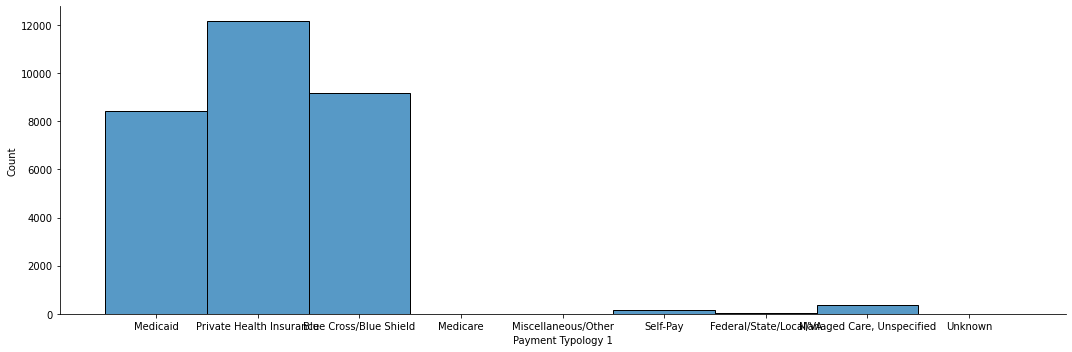

In [ ]:
sns.displot(df[li]['Payment Typology 1'],aspect=3)

In [ ]:
group =  df.groupby('CCS Diagnosis Description')
eme = (df['Type of Admission'] == 'Emergency')
group.count()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
CCS Diagnosis Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abdominal hernia,13483,13483,13483,13483,13488,13488,13391,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,9775,3959,13488,13488,13488,13488,13488
Abdominal pain,9725,9725,9725,9725,9729,9729,9652,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,6523,2656,9729,9729,9729,9729,9729
Acquired foot deformities,370,370,370,370,370,370,362,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,305,110,370,370,370,370,370
Acute and chronic tonsillitis,2152,2152,2152,2152,2156,2156,2110,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,1330,465,2156,2156,2156,2156,2156
Acute and unspecified renal failure,26190,26190,26190,26190,26202,26202,25776,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,21312,10097,26202,26202,26202,26202,26202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuberculosis,577,577,577,577,577,577,563,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,357,149,577,577,577,577,577
Umbilical cord complication,8697,8697,8697,8697,8704,8704,8621,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,4685,1829,8704,8704,8704,8704,8704
Urinary tract infections,34094,34094,34094,34094,34108,34108,33917,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,27339,12757,34108,34108,34108,34108,34108


In [ ]:
grouped = df.groupby('CCS Diagnosis Description', sort=False).count()
grouped.sort_index(ascending=True)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
CCS Diagnosis Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abdominal hernia,13483,13483,13483,13483,13488,13488,13391,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,13488,9775,3959,13488,13488,13488,13488,13488
Abdominal pain,9725,9725,9725,9725,9729,9729,9652,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,9729,6523,2656,9729,9729,9729,9729,9729
Acquired foot deformities,370,370,370,370,370,370,362,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,305,110,370,370,370,370,370
Acute and chronic tonsillitis,2152,2152,2152,2152,2156,2156,2110,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,1330,465,2156,2156,2156,2156,2156
Acute and unspecified renal failure,26190,26190,26190,26190,26202,26202,25776,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,26202,21312,10097,26202,26202,26202,26202,26202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuberculosis,577,577,577,577,577,577,563,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,357,149,577,577,577,577,577
Umbilical cord complication,8697,8697,8697,8697,8704,8704,8621,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,4685,1829,8704,8704,8704,8704,8704
Urinary tract infections,34094,34094,34094,34094,34108,34108,33917,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,34108,27339,12757,34108,34108,34108,34108,34108


In [ ]:
charge = (df['Total Costs'] > 2500000)
df[charge]

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
779660,Hudson Valley,Orange,3535001.0,708.0,Bon Secours Community Hospital,18 to 29,109,F,Black/African American,Not Span/Hispanic,8,Urgent,Home or Self Care,2012,189,Previous C-section,134,CESAREAN SECTION,540,Cesarean delivery,14,"Pregnancy, Childbirth and the Puerperium",1,Minor,Minor,Surgical,Medicaid,Medicaid,Self-Pay,0,N,N,53365.83,2561509.63
780863,Hudson Valley,Orange,3535001.0,708.0,Bon Secours Community Hospital,70 or Older,127,F,Black/African American,Not Span/Hispanic,8,Elective,Home w/ Home Health Services,2012,118,Phlebitis; thrombophlebitis and thromboembolism,61,OT OR PRCS VES NOT HEAD,197,Peripheral & other vascular disorders,5,Diseases and Disorders of the Circulatory System,1,Minor,Moderate,Medical,Medicare,Private Health Insurance,Self-Pay,0,N,Y,58304.06,2562477.66
1635792,New York City,Manhattan,7002050.0,1486.0,Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater...,30 to 49,NaN,M,Other Race,Not Span/Hispanic,120 +,Elective,Skilled Nursing Home,2012,5,HIV infection,222,BLOOD TRANSFUSION,890,HIV w multiple major HIV related conditions,24,Human Immunodeficiency Virus Infections,3,Major,Major,Medical,Medicare,Medicaid,NaN,0,N,N,4839726.15,3901874.34
1635793,New York City,Manhattan,7002050.0,1486.0,Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater...,30 to 49,NaN,F,White,Not Span/Hispanic,120 +,Elective,Skilled Nursing Home,2012,5,HIV infection,76,COLONOSCOPY AND BIOPSY,892,HIV w major HIV related condition,24,Human Immunodeficiency Virus Infections,3,Major,Major,Medical,Medicaid,NaN,NaN,0,N,N,4052052.40,3266837.58
1635794,New York City,Manhattan,7002050.0,1486.0,Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater...,50 to 69,NaN,M,Black/African American,Not Span/Hispanic,120 +,Elective,Home or Self Care,2012,5,HIV infection,29,ORAL AND DENTAL SVCS,892,HIV w major HIV related condition,24,Human Immunodeficiency Virus Infections,3,Major,Minor,Medical,Medicaid,NaN,NaN,0,N,N,3558653.45,2869050.47
1635796,New York City,Manhattan,7002050.0,1486.0,Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater...,50 to 69,NaN,F,Black/African American,Not Span/Hispanic,120 +,Elective,Skilled Nursing Home,2012,5,HIV infection,37,DX BRONCHOSCOPY & BIOPS,892,HIV w major HIV related condition,24,Human Immunodeficiency Virus Infections,4,Extreme,Extreme,Medical,Medicare,Medicaid,NaN,0,N,N,3331985.87,2686306.98
1636279,New York City,Manhattan,7002050.0,1486.0,Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater...,50 to 69,NaN,M,Black/African American,Not Span/Hispanic,120 +,Elective,Skilled Nursing Home,2012,5,HIV infection,227,"OT DX PRC (INTERVW,EVAL",890,HIV w multiple major HIV related conditions,24,Human Immunodeficiency Virus Infections,4,Extreme,Moderate,Medical,Medicare,Medicare,Medicaid,0,N,N,4324821.40,3486748.86
1723401,New York City,Manhattan,7002054.0,1458.0,New York Presbyterian Hospital - New York Weil...,50 to 69,112,M,Other Race,Spanish/Hispanic,22,Emergency,Inpatient Rehabilitation Facility,2012,131,Respiratory failure; insufficiency; arrest (ad...,71,GASTROSTOMY; TEMP/PERM,130,Respiratory system diagnosis w ventilator supp...,4,Diseases and Disorders of the Respiratory System,4,Extreme,Extreme,Medical,Medicaid,Medicaid,Self-Pay,0,N,N,276462.82,32311386.12
1789859,New York City,Manhattan,7002054.0,1464.0,New York Presbyterian Hospital - Columbia Pres...,50 to 69,100,F,Other Race,Not Span/Hispanic,1,Elective,Home 

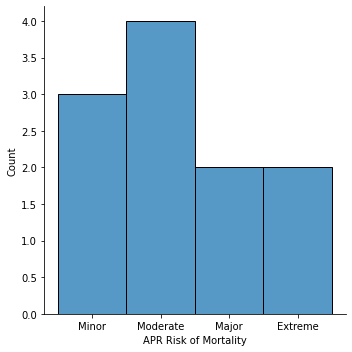

In [ ]:
sns.displot(df[charge]['APR Risk of Mortality'],aspect=1)